## Tarea 3 - Ejercicio 1

Estudiante: Rodrigo Mauricio Garcia Saenz

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Load training data and testing data
train = np.genfromtxt('DigitsTraining.csv', delimiter=',')
test = np.genfromtxt('DigitsTesting.csv', delimiter=',')

In [35]:

#Pre-processing data into data labels and data
X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]


#To plot line y = ax + b
def line(w, data=None):
    a = - w[1] / w[2]
    b = - w[0] / w[2]
    if data is not None:
        return a*data + b
    else:
        x_line = np.linspace(0.4, 1, 100)
        return a*x_line + b

def symmetry(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)

    vFliped = np.flip(X, axis=0)
    hFliped = np.flip(X, axis=1)

    #Sh = np.sum((X - hFliped))/256
    Sh = np.mean(np.abs(X - hFliped))
    #Sv = np.sum((X - vFliped))/256
    Sv = np.mean(np.abs(X - vFliped))
    symm = np.mean([Sh, Sv])
    return symm

In [36]:
# Prepare Training Data for 7's and 1's 
#Extract the Digit1 and Digit2 from the data
Digit1 = X_train[y_train == 7]
y_train_Digit1 = np.ones(len(Digit1))
Digit2 = X_train[y_train == 1]
y_train_Digit2 = -np.ones(len(Digit2))


symm_Digit2 = [symmetry(im) for im in Digit2]
symm_Digit1 = [symmetry(im) for im in Digit1]

#Calculate averages and symmetries of the digits in training data
# axis=1 -> la 2da columna son la intensidad de color en pixeles
avg_intensity_Digit1 = np.mean(Digit1, axis=1) 
avg_intensity_Digit2 = np.mean(Digit2, axis=1)


#Concatenate the intensities and symmetry
new_Digit1 = np.c_[avg_intensity_Digit1, symm_Digit1]
new_Digit2 = np.c_[avg_intensity_Digit2, symm_Digit2]


#Stack all the data together and randomize their locations.
X_new = np.r_[new_Digit1, new_Digit2]
y_new = np.r_[y_train_Digit1, y_train_Digit2]
R_num = np.random.randint(X_new.shape[0], size = (X_new.shape[0],))
X_new = X_new[R_num]
y_new = y_new[R_num]


In [37]:
#Prepare the test data for 7's and 1's 
X_test_Digit1 = X_test[y_test == 7]
y_test_Digit1 = np.ones(len(X_test_Digit1))
X_test_Digit2 = X_test[y_test == 1]
y_test_Digit2 = -np.ones(len(X_test_Digit2))

X_test_new = np.r_[X_test_Digit1, X_test_Digit2]
y_test_new = np.r_[y_test_Digit1, y_test_Digit2]

R = np.random.randint(X_test_new.shape[0], size = (X_test_new.shape[0],))

X_test_new = X_test_new[R]
y_test_new = y_test_new[R]

#Calculate averages and symmetries of the digits in testing data
avg_int_test = np.mean(X_test_new, axis=1)
# avg_int_test = [np.mean(im) for im in X_test_new]
test_symm = [symmetry(im) for im in X_test_new]

X_test_final = np.c_[avg_int_test, test_symm]



In [38]:
#Perceptron function for n iterations
def perceptron(input_data, y, input_data_test, y_test, max_iter):
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    w = np.random.random(data.shape[1]).reshape(-1,1)   
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    difference = (f != current)
    t = 0
    Ein = []
    Eout = []

    while np.any(difference) and t < max_iter:
        for i, diferencia in enumerate(difference):
            if diferencia == True:
                # Actualiza w = w+yx
                w = w + f[i]*data[i, :].reshape(w.shape)
                # recalculando
                current = np.sign(data @ w)
                difference = (f != current)
                Ein.append((1/len(data)) * np.sum(np.square(current - f)))

                h_test = np.sign(data_test @ w)
                Eout.append((1/len(data_test)) * np.sum(np.square(h_test - y_test)))
                t += 1
                break
    return Ein,Eout,w

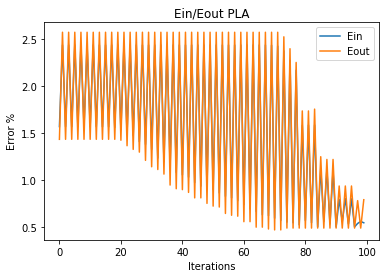

In [39]:
Ein,Eout, weight = perceptron(X_new, y_new,X_test_final,y_test_new, 100)
#Plot the graph
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(weight))
# plt.plot(x_line, color='c')
# plt.plot(line(weight), color='g')
plt.title('PLA')
plt.show()

#Plot Ein and Eout 
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

In [40]:
def pocket(input_data,y,input_data_test,y_test,max_iter,w=None):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    if w is None:
       w = np.random.random(data.shape[1]).reshape(-1,1)    
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    t = 0
    Ein = [2]
    Eout = [2]

    wf = w.copy()
    while np.any(difference) and t < max_iter:
        for i, diferencia in enumerate(difference):
            if diferencia == True:
                # Actualizando w = w+yx
                w = w + f[i]*data[i, :].reshape(w.shape)
                # recalculando 
                current = np.sign(data @ w)
                difference = (f != current)
                # avaluar el mejor entre wf (pocket) y w (wt(t))
                hf = np.sign(data @ wf)
                incorrectos_w = np.count_nonzero(f != current)
                incorrectos_wf = np.count_nonzero(f != hf)
                # actualizando (poniendo el mejor al bolsillo)
                if incorrectos_w < incorrectos_wf:
                    wf = w.copy()
                Ein.append((1/len(data)) * np.sum(np.square(current - f)))
                h_test = np.sign(data_test @ wf)
                Eout.append((1/len(data_test)) * np.sum(np.square(h_test - y_test)))
                t += 1
                break
    return Ein,Eout,wf

w: [[-0.3367997 ]
 [-1.82930185]
 [ 8.38770027]]


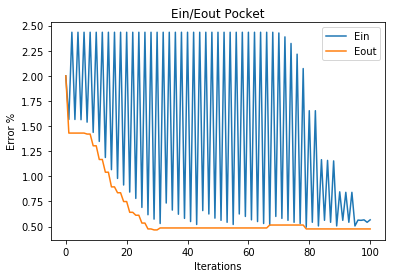

In [41]:
#Using pocket algorithm
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 100)
print('w:', w)
#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()

#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

In [42]:
# Linear Regression
def lin(input_data,y,input_data_test,y_test,):
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]

    X_pseudo = np.linalg.inv(data.T @ data) @ data.T
    w = X_pseudo @ y
    
    Y_pred = np.sign(data @ w)
    Ein = (1/len(Y_pred)) * np.sum(np.square(Y_pred - y))

    Y_pred_test = np.sign(data_test @ w)
    Eout = (1/len(Y_pred_test)) * np.sum(np.square(Y_pred_test - y_test))
    
    return Ein,Eout,w

In [43]:
Ein, Eout,w = lin(X_new, y_new,X_test_final,y_test_new)
print('Ein LIN:',Ein)
print('Eout LIN:',Eout)
print('w:', w)

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()



Ein LIN: 0.016969696969696968
Eout LIN: 0.17518248175182483
w: [-5.16963943  4.4595728  10.05547665]


In [44]:
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 100,w.reshape(-1,1))

print('Ein Pocket:',min(Ein))
print('Eout Pocket:',min(Eout))

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()

#Plot Ein and Eout 
plt.title('Ein/Eout Pocket with Linear Regresion Initial Weights')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()

Ein Pocket: 0.026666666666666665
Eout Pocket: 0.17518248175182483


Comparando los resultados de $E_{in}$ y $E_{out}$ de la aplicación del algoritmo del perceptrón *pocket*, vemos que al iniciar $w$ en un valor al azar, $E_{out}$ empieza con un valor cercano a $E_{in}$ y se mantiene  bajando junto con las oscilaciones de $E_{in}$.

En cambio al aplicar el *pocket* con $w$ iniciado como resultado de aplicar la regresión lineal, $E_{out}$ luego de las primeras iteraciones baja rápidamente a porcentajes cercanos a 0. Esto por que ya se tiene un valor de $w$ cercano a la solución y los errores con respecto los mismos datos son bajos.